In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import cv2
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

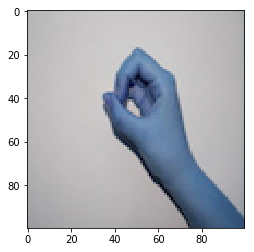

In [3]:
img = cv2.imread('Sign-Language-Digits-Dataset/Dataset/0/IMG_1118.JPG')

plt.imshow(img)
plt.show()

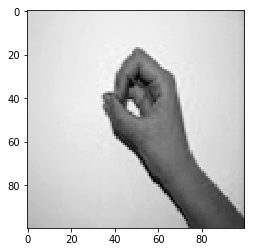

In [4]:
red = img[:, :, 0]
plt.imshow(red, cmap = 'gray')
plt.show()

In [5]:
X = img[:, :, 0].flatten()
X = np.reshape(X, (X.shape[0], 1))
y_pred = KMeans(n_clusters = 2, random_state = 170).fit_predict(X)

In [6]:
y_pred.shape

(10000,)

In [7]:
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [8]:
y_pred = y_pred.reshape(img.shape[0], img.shape[1])

y_pred

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [11]:
def invert(img):
    m, n = img.shape
    for i in range(m):
        for j in range(n):
            if img[i][j] == 1:
                img[i][j] = 0
            else:
                img[i][j] = 1
    return img

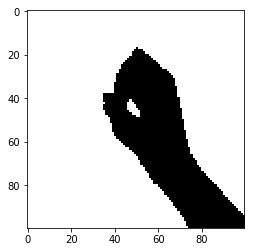

In [14]:
plt.imshow(y_pred, cmap = 'gray')
plt.show()

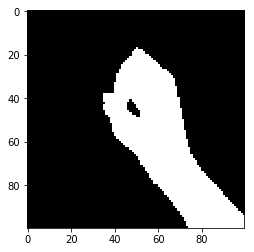

In [15]:
mask = invert(y_pred)


plt.imshow(mask, cmap = 'gray')
plt.show()

In [18]:
def element_wise_multiply(img, mask):
    m, n = img.shape
    result = np.ones((m, n))
    for i in range(m):
        for j in range(n):
            result[i][j] = img[i][j] * mask[i][j]
    return result

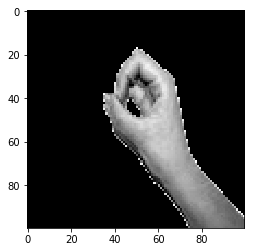

In [19]:
plt.imshow(element_wise_multiply(red, mask), cmap = 'gray')
plt.show()